In [ ]:
pip install Keras-Preprocessing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.1 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from warnings import filterwarnings
filterwarnings('ignore')
import os
import plotly.graph_objects as go
from plotly.offline import iplot, init_notebook_mode
import plotly.express as px
import plotly.io as pio
from nltk.corpus import stopwords
from nltk import word_tokenize
import time
import re
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import statsmodels.api as sma
import statsmodels.formula.api as smfa
import statsmodels.tsa.stattools as smstt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.stattools import adfuller
%matplotlib inline

import nltk
from nltk.corpus import stopwords
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
import string
nltk.download('punkt')
from sklearn.preprocessing import MaxAbsScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn import metrics
from imblearn.over_sampling import RandomOverSampler

from tqdm import tqdm, trange
import io
import logging
import sklearn
import torch
import torchvision
import nltk
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.utils import plot_model
from keras.losses import categorical_crossentropy
from sklearn.metrics import accuracy_score, confusion_matrix
from keras.preprocessing.text import one_hot
from keras_preprocessing.sequence import pad_sequences
from keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten
from keras.layers import Activation, GlobalMaxPool1D
from keras.layers import Embedding, Conv1D, Dense, Dropout, GlobalMaxPooling1D
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report, roc_auc_score
from tensorflow.keras.utils import plot_model

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
df = pd.read_csv('/content/sample_data/Лист1.csv - final psycho - final psycho - Лист1.csv.csv.csv')
df.tail()

,Text,Syndrome
705,I had always been treated with antidepressant...,Bipolar
706,I couldn't sleep. At one time I got about 12 h...,Bipolar
707,I almost only get mixed states that come with ...,Bipolar
708,I've gone much of my life. Anywho...\nI had a...,Bipolar
709,My boyfriend has been my biggest support for t...,Bipolar


In [ ]:
from nltk.corpus import stopwords
all_stopwords = stopwords.words('english')
all_stopwords.remove('i')
all_stopwords.remove('me')
all_stopwords.remove('my')

In [ ]:
df['Text_without_stopwords'] = df['Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (all_stopwords)]))

In [ ]:
def remove_extra_white_spaces(text):
    single_char_pattern = r'\s+[a-zA-Z]\s+'
    without_sc = re.sub(pattern=single_char_pattern, repl=" ", string=text)
    return without_sc

In [ ]:
def remove_numbers(text):
    number_pattern = r'\d+'
    without_number = re.sub(pattern=number_pattern, repl=" ", string=text)
    return without_number

In [ ]:
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

In [ ]:
def lower(text):
    stroka = text.lower()
    return stroka

In [ ]:
def stemmer(text):
    tweet = TweetTokenizer()
    tokens = tweet.tokenize(text)

    stemmer = nltk.SnowballStemmer('english')

    for i in range(len(tokens)):
        stem_word = stemmer.stem(tokens[i])
        tokens[i] = stem_word
    return " ".join(tokens)

In [ ]:
df['Text_without_stopwords'] = df['Text_without_stopwords'].apply(lambda x:  remove_numbers(x))
df['Text_without_stopwords'] = df['Text_without_stopwords'].apply(lambda x:  lower(x))
df['Text_without_stopwords'] = df['Text_without_stopwords'].apply(lambda x:  stemmer(x))
df['Text_without_stopwords'] = df['Text_without_stopwords'].apply(lambda x:  remove_punctuation(x))
df['Text_without_stopwords'] = df['Text_without_stopwords'].apply(lambda x:  remove_extra_white_spaces(x))

In [ ]:
def leadMyWord(text):
    text = re.sub('[^a-zA-Z]'," ",text) # заменяет все символы, кроме букв английского алфавита (как в верхнем, так и в нижнем регистре), на пробелы
    return text

textList = df.Text_without_stopwords.apply(leadMyWord)
textList = list(textList)

In [ ]:
le = LabelEncoder()
labelEncode = le.fit_transform(df["Syndrome"])
#print("LabelEncode")
#print(labelEncode)
categorical_y = to_categorical(labelEncode)
#print("To_Categorical")
#print(categorical_y)

In [ ]:
MAX_FEATURES = 9000

onehot_corpus = []
for text in textList:  #создает список, который содержит представления текстов из списка textList в виде one-hot векторов
    onehot_corpus.append(one_hot(text,MAX_FEATURES))

maxTextLen = 0
for text in textList:
    word_token=word_tokenize(text)
    if(maxTextLen < len(word_token)):
        maxTextLen = len(word_token)

print("Max number of words : ",maxTextLen)

padded_corpus=pad_sequences(onehot_corpus,maxlen=maxTextLen,padding='post')
x_train2,x_test2,y_train2,y_test2 = train_test_split(padded_corpus,categorical_y,test_size=0.2,random_state=42)

In [ ]:
def build_cnn_model():
    model = Sequential()

    model.add(Embedding(input_dim=MAX_FEATURES, output_dim=165, input_length=maxTextLen))

    model.add(Dropout(0.25))
    model.add(Conv1D(filters=128, kernel_size=3, padding='same', activation='relu'))
    model.add(Conv1D(filters=128, kernel_size=4, padding='same', activation='relu'))
    model.add(Conv1D(filters=128, kernel_size=5, padding='same', activation='relu'))
    model.add(GlobalMaxPooling1D(data_format ='channels_last'))
    model.add(Dense(250, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(units=7,activation="softmax"))

    optimizer = Adam(lr=0.001,beta_1=0.9,beta_2=0.999)
    #optimizer = keras.optimizers.Adamax(lr=0.001, beta_1=0.9, beta_2=0.999)

    model.compile(optimizer=optimizer,metrics=["accuracy"],loss=categorical_crossentropy)
    return model

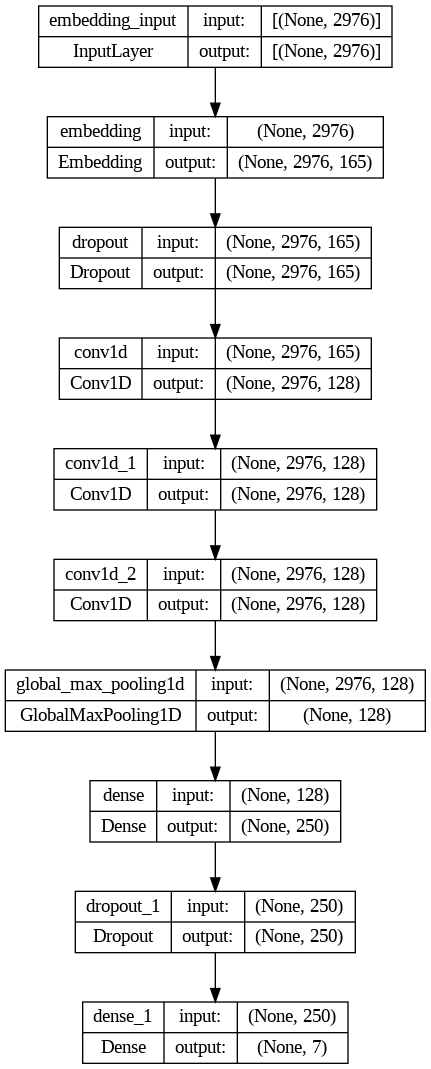

In [ ]:
cnn_model = build_cnn_model()
plot_model(cnn_model,show_shapes=True)

In [ ]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 2976, 165)         1485000   
                                                                 
 dropout (Dropout)           (None, 2976, 165)         0         
                                                                 
 conv1d (Conv1D)             (None, 2976, 128)         63488     
                                                                 
 conv1d_1 (Conv1D)           (None, 2976, 128)         65664     
                                                                 
 conv1d_2 (Conv1D)           (None, 2976, 128)         82048     
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                        

In [ ]:
cnn_history = cnn_model.fit(x_train2,y_train2,epochs=100,batch_size=500,shuffle=True)
ypred2 = cnn_model.predict(x_test2)

Epoch 1/100
2/2 [==============================] - 85s 6s/step - loss: 1.9423 - accuracy: 0.1655
Epoch 2/100
2/2 [==============================] - 61s 8s/step - loss: 1.9283 - accuracy: 0.1919
Epoch 3/100
2/2 [==============================] - 67s 8s/step - loss: 1.9185 - accuracy: 0.1919
Epoch 4/100
2/2 [==============================] - 61s 7s/step - loss: 1.9138 - accuracy: 0.1901
Epoch 5/100
2/2 [==============================] - 63s 7s/step - loss: 1.9126 - accuracy: 0.1989
Epoch 6/100
2/2 [==============================] - 61s 8s/step - loss: 1.9138 - accuracy: 0.1866
Epoch 7/100
2/2 [==============================] - 60s 7s/step - loss: 1.9097 - accuracy: 0.1884
Epoch 8/100
2/2 [==============================] - 64s 7s/step - loss: 1.9064 - accuracy: 0.1849
Epoch 9/100
2/2 [==============================] - 61s 8s/step - loss: 1.9006 - accuracy: 0.1954
Epoch 10/100
2/2 [==============================] - 60s 7s/step - loss: 1.9043 - accuracy: 0.1919
Epoch 11/100
2/2 [===========

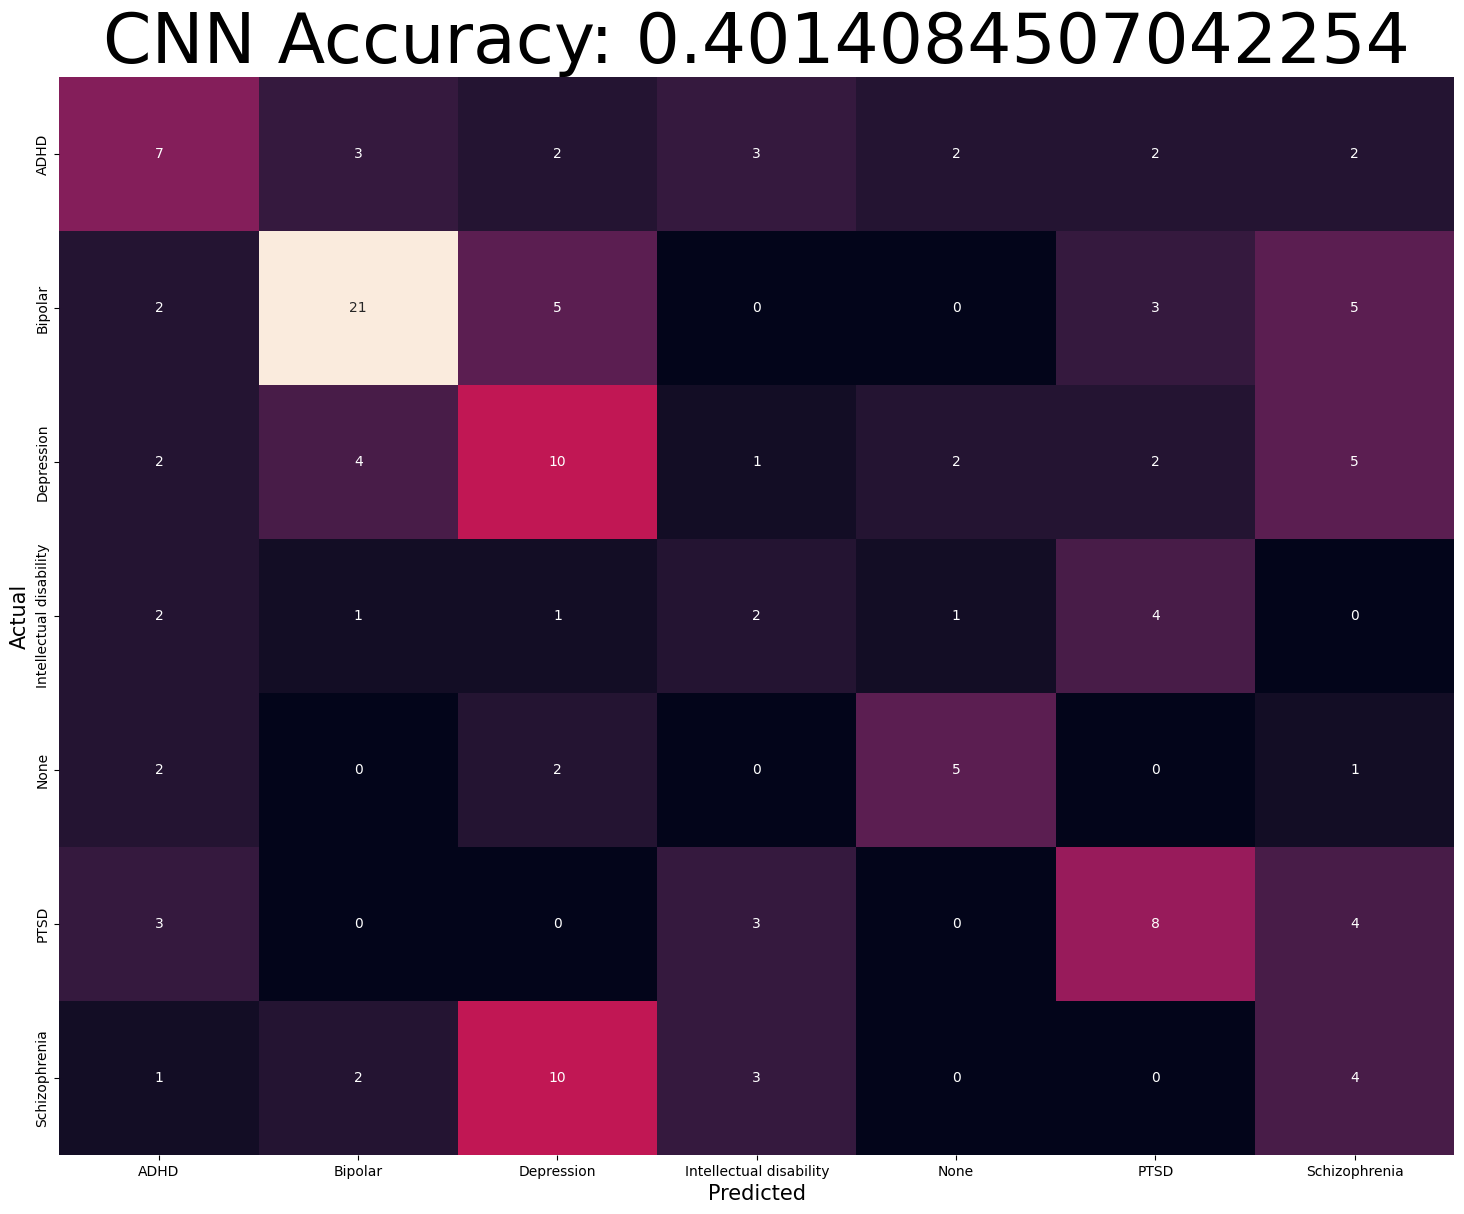

In [ ]:
cnn_accuracy = accuracy_score(y_test2.argmax(axis=1),ypred2.argmax(axis=1))
#print("CNN Accuracy:",cnn_accuracy)
cnn_cn = confusion_matrix(y_test2.argmax(axis=1),ypred2.argmax(axis=1))
plt.subplots(figsize=(18,14))
sns.heatmap(cnn_cn,annot=True,fmt="1d",cbar=False,xticklabels=le.classes_,yticklabels=le.classes_)
plt.title("CNN Accuracy: {}".format(cnn_accuracy),fontsize=50)
plt.xlabel("Predicted",fontsize=15)
plt.ylabel("Actual",fontsize=15)
plt.show()

In [ ]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test2.argmax(axis=1), ypred2.argmax(axis=1), average='weighted')
print("F1 Score:", f1)
f1_macro = f1_score(y_test2.argmax(axis=1), ypred2.argmax(axis=1), average='macro')
print("F1 Score (macro avg):", f1_macro)

F1 Score: 0.4070573574031947
F1 Score (macro avg): 0.37649656513069335


In [ ]:
#cnn_model.save('model_2_w.h5')